## **二次元配列と勾配問題**

**【問題1】1次関数**  
$x$が-50から50の範囲で次の式を考えます。

$$
y=\frac{1}{2}x+1
$$

-50から50まで0.1間隔のxを表すndarrayと、各要素に対するyを表すndarrayを作成してください。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from decimal import Decimal, ROUND_HALF_UP, ROUND_HALF_EVEN
import math
np.set_printoptions(threshold=100) 

In [2]:
x_ndarray = np.arange(-50, 50.1, 0.1)
print(x_ndarray)
print(x_ndarray.shape)

[-50.  -49.9 -49.8 ...  49.8  49.9  50. ]
(1001,)


In [3]:
y_ndarray = (1/2)*x_ndarray + 1
print(y_ndarray)
print(y_ndarray.shape)

[-24.   -23.95 -23.9  ...  25.9   25.95  26.  ]
(1001,)


***

**【問題2】配列の結合**  
問題1で作成したndarrayを結合し、(1001, 2)の形の配列にしてください。0列目にx、1列目にyが来るようにします。

In [4]:
x_ndarray = x_ndarray.reshape(1001, 1)
y_ndarray = y_ndarray.reshape(1001, 1)

xy_ndarray = np.concatenate((x_ndarray, y_ndarray), axis=1)
print(xy_ndarray)
print(xy_ndarray.shape)

[[-50.   -24.  ]
 [-49.9  -23.95]
 [-49.8  -23.9 ]
 ...
 [ 49.8   25.9 ]
 [ 49.9   25.95]
 [ 50.    26.  ]]
(1001, 2)


***

**【問題3】勾配を求める**  
各x座標における勾配を求めます。ここで勾配はyの変化量をxの変化量で割ることで計算します。  
![代替テキスト](https://t.gyazo.com/teams/diveintocode/7fd04c4808b8a0150a49c908e21f3cd2.png)  

各変化量は以下の図のように隣同士の要素の差から近似的に求めます。
![](https://t.gyazo.com/teams/diveintocode/398d8c5b4b1bd4151dea6488059226a1.png)  

《注意》  
- 厳密に各点における勾配を求めるには極限（微分）を利用する必要があります
- 勾配はx座標の間隔を使うので、xの要素数に対して一つ少なくなります

In [5]:
gradient_ndarray = (y_ndarray[1:] - y_ndarray[:-1]) / (x_ndarray[1:] - x_ndarray[:-1]) 
print(gradient_ndarray)
print(len(gradient_ndarray))

[[0.5]
 [0.5]
 [0.5]
 ...
 [0.5]
 [0.5]
 [0.5]]
1000


各x座標における勾配は0.5

***

**【問題4】グラフを描く**  
1次関数のグラフをMatplotlibを用いて描いてください。また、それとは別に横軸をx、縦軸を勾配としたグラフも描いてください。

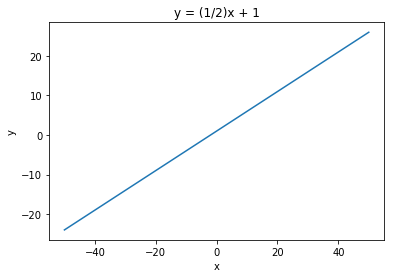

In [6]:
plt.plot(x_ndarray, y_ndarray)
plt.title("y = (1/2)x + 1")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

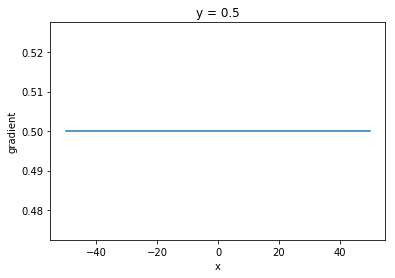

In [7]:
plt.plot(x_ndarray[:-1], gradient_ndarray)
plt.title("y = 0.5")
plt.xlabel("x")
plt.ylabel("gradient") #勾配
plt.show()

***

**【問題5】Pythonの関数化**  
問題1から問題3までの範囲をまとめて行うPythonの関数を雛形を参考に作成してください。


そして、以下の3式の勾配を0.1間隔で求めてndarrayで出力してください。  

$$
y = x^2~~~~~(-50 \leq x \leq 50)
$$
$$
y = 2x^2 + 2^x~~~~~(-50 \leq x \leq 50)
$$
$$
y = \sin (x^\frac{1}{2})~~~~~(0 \leq x \leq 50)
$$

また、問題4と同様にグラフを描いてください。

ndarrayに対して三角関数のsinの計算を行うには np.sin()を用います。  

[numpy.sin — NumPy v1.19 Manual](https://numpy.org/doc/stable/reference/generated/numpy.sin.html#numpy.sin)

In [8]:
def compute_gradient(function, x_range=(-50, 50.1, 0.1)):
    """
    変化量を使い勾配を計算する。

    Parameters
    ----------------
    function : function
    求めたい関数、xのndarrayを入れるとyのndarrayを返すもの。
    x_range : tuple
    np.arange()の引数と同じ方法で範囲を指定する。

    Returns
    ----------------
    array_xy : ndarray, shape(n, 2)
    xとyを結合したもの。nはx_rangeに依存する。
    xy_ndarray: ndarray, shape(n-1,)
    関数の勾配。差をとるため要素は1つ減る
    """
    array_x = np.arange(x_range[0], x_range[1], x_range[2])
    array_y = function(array_x)
    
    row_num = (x_range[1] - x_range[0])/x_range[2] #この行の計算でなぜか「1001」ではなく「1000.99...」になる
    row_num = Decimal(str(row_num)).quantize(Decimal("0"), rounding=ROUND_HALF_UP) #上記の理由で四捨五入して「1001」にする
    
    array_x = array_x.reshape(int(row_num), 1) #Decimal型の代入不可につきint型へ変換
    array_y = array_y.reshape(int(row_num), 1)

    array_xy = np.concatenate((array_x, array_y), axis=1)
    
    gradient = (array_y[1:] - array_y[:-1]) / (array_x[1:] - array_x[:-1])
    
    return array_xy, gradient

def function1(array_x):
    """
    array_yを作る関数
    -------------------
    y = (1/2)x + 1 
    """
    array_y = (1/2)*array_x + 1
    
    return array_y

def function2(array_x):
    """
    array_yを作る関数
    -------------------
    y = x^2
    """
    array_y = array_x**2
    
    return array_y

def function3(array_x):
    """
    array_yを作る関数
    -------------------
    y = 2x^2 + 2^x
    """
    array_y = 2*(array_x**2) + 2**array_x
    
    return array_y

def function4(array_x):
    """
    array_yを作る関数
    追記：作成時には、np.sin()の存在を忘れていた・・
    -------------------
    y = sin(x^\frac{1}{2})
    """
    array_y = np.array([])
    
    for i in range(len(array_x)):
        y_values = math.sin(array_x[i]**(1/2))
        array_y = np.append(array_y, y_values) 
    
    return array_y

def function5(array_x):
    """
    array_yを作る関数
    np.sin()でも作成してみる
    -------------------
    y = sin(x^\frac{1}{2})
    """
    array_y = np.sin(array_x**(1/2)) 
    
    return array_y

$
y=\frac{1}{2}x+1~~~~~(-50 \leq x \leq 50)
$  
xの間隔：0.1  
勾配ndarrayは、

In [9]:
array_xy, gradient = compute_gradient(function1)
#print(array_xy)
#print("--------------------------------------------------------------")
print(gradient)

[[0.5]
 [0.5]
 [0.5]
 ...
 [0.5]
 [0.5]
 [0.5]]


$
y = x^2~~~~~(-50 \leq x \leq 50)
$  
xの間隔：0.1  
勾配ndarrayは、

In [10]:
#np.set_printoptions(threshold=3000) 
array_xy, gradient = compute_gradient(function2)
#print(array_xy)
#print("--------------------------------------------------------------")
print(gradient)

[[-99.9]
 [-99.7]
 [-99.5]
 ...
 [ 99.5]
 [ 99.7]
 [ 99.9]]


$
y = 2x^2 + 2^x~~~~~(-50 \leq x \leq 50)
$  
xの間隔：0.1  
勾配ndarrayは、

In [11]:
array_xy, gradient = compute_gradient(function3)
#print(array_xy)
#print("--------------------------------------------------------------")
print(gradient)

[[-1.99800000e+02]
 [-1.99400000e+02]
 [-1.99000000e+02]
 ...
 [ 6.56379007e+14]
 [ 7.03489601e+14]
 [ 7.53981486e+14]]


$
y = \sin (x^\frac{1}{2})~~~~~(0 \leq x \leq 50)
$  
xの間隔：0.1  
勾配ndarrayは、

In [12]:
array_xy, gradient = compute_gradient(function4, (0, 50, 0.1))
#print(array_xy)
#print("--------------------------------------------------------------")
print(gradient)

[[3.10983593]
 [1.21471246]
 [0.88289461]
 ...
 [0.05128261]
 [0.05088227]
 [0.05048058]]


***

**【問題6】最小値を求める**  
問題5で扱った関数のyの最小値を求めます。xの範囲も問題5と同様とします。


今回は勾配降下法ではなく、ndarrayのminメソッド、argminメソッドを用いてください。minメソッドは最小値を、argminメソッドは最小値のインデックスを取得することができます。


また、最小のyをとる前後の勾配を表示してください。

[numpy.ndarray.min — NumPy v1.19 Manual](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.min.html)  
[numpy.ndarray.argmin — NumPy v1.19 Manual](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.argmin.html)

- $y = x^2~~~~~(-50 \leq x \leq 50)~~~~~$の最小値と、その前後の勾配

In [13]:
array_xy, gradient = compute_gradient(function2, x_range=(-50, 50.1, 0.1))

print("最小値は{}".format(np.min(function2(np.arange(-50, 50.1, 0.1)))))

min_index = np.argmin(function2(np.arange(-50, 50.1, 0.1)))
print("最小値のインデックスは{}".format(min_index))

front_gradient = gradient[min_index - 2] #※1より
back_gradient = gradient[min_index] #※1より
print("最小のyをとる前後の勾配は{},{}".format(front_gradient, back_gradient))
print("※1.勾配は「任意の地点のインデックス」-「任意の地点のインデックス - 1」の関係で算出ししている。")

最小値は5.048709793414476e-25
最小値のインデックスは500
最小のyをとる前後の勾配は[-0.3],[0.1]
※1.勾配は「任意の地点のインデックス」-「任意の地点のインデックス - 1」の関係で算出ししている。


- $y = 2x^2 + 2^x~~~~~(-50 \leq x \leq 50)~~~~~$の最小値と、その前後の勾配

In [14]:
array_xy, gradient = compute_gradient(function3, x_range=(-50, 50.1, 0.1))

print("最小値は{}".format(np.min(function3(np.arange(-50, 50.1, 0.1)))))

min_index = np.argmin(function3(np.arange(-50, 50.1, 0.1)))
print("最小値のインデックスは{}".format(min_index))

front_gradient = gradient[min_index - 2] #※1より
back_gradient = gradient[min_index] #※1より
print("最小のyをとる前後の勾配は{},{}".format(front_gradient, back_gradient))
print("※1.勾配は「任意の地点のインデックス」-「任意の地点のインデックス - 1」の関係で算出ししている。")

最小値は0.9505505632959851
最小値のインデックスは498
最小のyをとる前後の勾配は[-0.85605887],[0.02482428]
※1.勾配は「任意の地点のインデックス」-「任意の地点のインデックス - 1」の関係で算出ししている。


- $y = \sin (x^\frac{1}{2})~~~~~(0 \leq x \leq 50)~~~~~$の最小値と、その前後の勾配

In [15]:
array_xy, gradient = compute_gradient(function4, x_range=(0, 50.1, 0.1))

print("最小値は{}".format(np.min(function4(np.arange(0, 50.1, 0.1)))))

min_index = np.argmin(function4(np.arange(0, 50.1, 0.1)))
print("最小値のインデックスは{}".format(min_index))

front_gradient = gradient[min_index - 2] #※1より
back_gradient = gradient[min_index] #※1より
print("最小のyをとる前後の勾配は{},{}".format(front_gradient, back_gradient))
print("※1.勾配は「任意の地点のインデックス」-「任意の地点のインデックス - 1」の関係で算出ししている。")

最小値は-0.9999997540298113
最小値のインデックスは222
最小のyをとる前後の勾配は[-0.00177271],[0.00048745]
※1.勾配は「任意の地点のインデックス」-「任意の地点のインデックス - 1」の関係で算出ししている。
